In [2]:
#libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


In [3]:
df=pd.read_csv('Salary_dataset.csv')

In [4]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


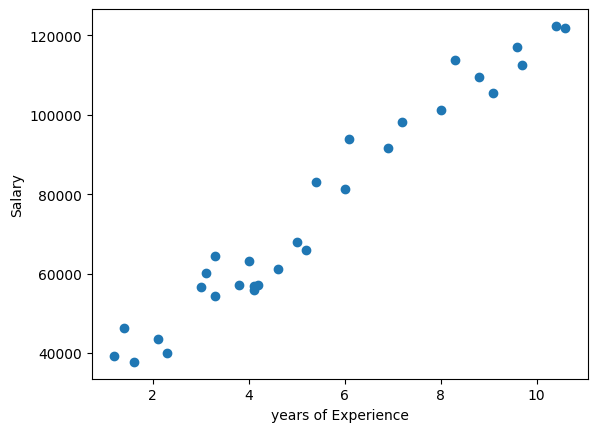

In [8]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.ylabel('Salary')
plt.xlabel('years of Experience')
plt.show()

In [9]:
df.corr()

,Unnamed: 0,YearsExperience,Salary
Unnamed: 0,1.000000,0.986460,0.960826
YearsExperience,0.986460,1.000000,0.978242
Salary,0.960826,0.978242,1.000000


In [12]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [14]:
#splitting the into independent and dependent data
X=df[['YearsExperience']]

In [18]:
np.array(X).shape


(30, 1)

In [19]:
y=df['Salary']

In [20]:
np.array(y).shape

(30,)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.75)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
np.array(X_train).shape

(7, 1)

In [26]:
X_test=scaler.transform(X_test)


C:\Users\kesha\OneDrive\sindoo\OneDrive\Desktop\PROJECTS\SIMPLE LINEAR REGRESSION\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [29]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [30]:
regression.coef_

array([22431.73082238])

In [31]:
regression.intercept_

np.float64(78068.71428571429)

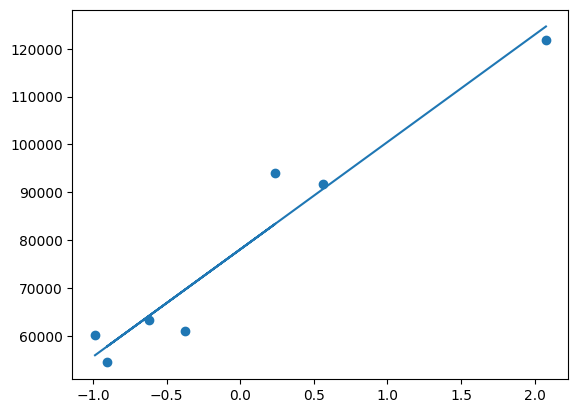

In [33]:
#plotting best-fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))


In [34]:
regression.predict(X_test)

array([295656.50326283, 190227.36839763, 264252.0801115 , 199200.06072658,
       152093.42599958, 163309.29141077, 311358.7148385 , 275467.94552269,
       170038.81065749, 104986.79127257, 129661.6951772 , 194713.71456211,
       145363.90675286, 172281.98373972, 170038.81065749, 257522.56086478,
       109473.13743705, 113959.48360153, 282197.4647694 , 125175.34901272,
       239577.17620687, 293413.33018059, 212659.09922001])

In [36]:
#perform metrics
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_train,regression.predict(X_train))
mae=mean_absolute_error(y_train,regression.predict(X_train))
rmse=math.sqrt(mse)
print(mse,mae,rmse)

31780723.944790605 4480.276819737148 5637.439484800755


In [42]:
regression.predict(scaler.transform([[7.5]]))

array([246306.69545359])